In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df=pd.read_csv("train.csv")

In [3]:
test_df=pd.read_csv("test.csv")



In [59]:
all_data = train_df.append(test_df, sort = False)

In [4]:
all_data.head

<bound method NDFrame.head of        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... P

In [5]:
train_df.shape

(1168, 81)

In [6]:
# Checking for null values

In [7]:
train_df.isnull().values.any()

True

In [8]:

train_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [9]:
train_df[["MiscFeature","Fence","PoolQC","Alley"]]
#df[['Test_1', 'Test_3']]

MiscFeature  Fence PoolQC Alley
0            NaN    NaN    NaN   NaN
1            NaN    NaN    NaN   NaN
2            NaN    NaN    NaN   NaN
3            NaN  MnPrv    NaN   NaN
4            NaN    NaN    NaN   NaN
...          ...    ...    ...   ...
1163         NaN  MnPrv    NaN   NaN
1164         NaN  MnPrv    NaN   NaN
1165         NaN    NaN    NaN   NaN
1166         NaN  MnPrv    NaN  Pave
1167         NaN    NaN    NaN   NaN

[1168 rows x 4 columns]

In [10]:
for col in train_df.columns:
#     if train_df[col].dtype=='object':
        print(str(col)+ ':' + str(train_df[col].unique()))
        print(train_df[col].value_counts())
        print("*******************************************")
        print('\n')

Id:[127 889 793 ... 196  31 617]
1460    1
501     1
476     1
477     1
478     1
       ..
959     1
961     1
962     1
963     1
1       1
Name: Id, Length: 1168, dtype: int64
*******************************************


MSSubClass:[120  20  60  50  70  30 160  85  45  90  40  80 190  75 180]
20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64
*******************************************


MSZoning:['RL' 'RM' 'FV' 'RH' 'C (all)']
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64
*******************************************


LotFrontage:[ nan  95.  92. 105.  58.  88.  70.  80.  50.  44. 129.  59.  55.  64.
  24.  68.  71.  74.  61.  60. 120.  84. 141.  30.  65.  76. 100.  85.
  75. 107. 122.  82.  62.  73.  79.  77.  41.  69.  90.  96.  72.  34.
  78.  63.  40.  98. 160. 108. 128.  51.  8

In [11]:
train_df.drop(columns=['Id','Street','Alley','Utilities','PoolQC','MiscFeature','MiscVal','GarageYrBlt','GarageFinish','GarageQual','1stFlrSF','2ndFlrSF'],axis=1,inplace=True)
#add these columns also - 'GarageYrBlt','GarageFinish','GarageQual','1stFlrSF','2ndFlrSF',''

In [51]:
test_df.drop(columns=['Id','Street','Alley','Utilities','PoolQC','MiscFeature','MiscVal','GarageYrBlt','GarageFinish','GarageQual','1stFlrSF','2ndFlrSF'],axis=1,inplace=True)
#add these columns also - 'GarageYrBlt','GarageFinish','GarageQual','1stFlrSF','2ndFlrSF',''

In [12]:
train_df.shape

(1168, 69)

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 69 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    954 non-null    float64
 3   LotArea        1168 non-null   int64  
 4   LotShape       1168 non-null   object 
 5   LandContour    1168 non-null   object 
 6   LotConfig      1168 non-null   object 
 7   LandSlope      1168 non-null   object 
 8   Neighborhood   1168 non-null   object 
 9   Condition1     1168 non-null   object 
 10  Condition2     1168 non-null   object 
 11  BldgType       1168 non-null   object 
 12  HouseStyle     1168 non-null   object 
 13  OverallQual    1168 non-null   int64  
 14  OverallCond    1168 non-null   int64  
 15  YearBuilt      1168 non-null   int64  
 16  YearRemodAdd   1168 non-null   int64  
 17  RoofStyle      1168 non-null   object 
 18  RoofMatl

In [14]:
train_df.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0         120       RL          NaN     4928      IR1         Lvl    Inside   
1          20       RL         95.0    15865      IR1         Lvl    Inside   
2          60       RL         92.0     9920      IR1         Lvl   CulDSac   
3          20       RL        105.0    11751      IR1         Lvl    Inside   
4          20       RL          NaN    16635      IR1         Lvl       FR2   

  LandSlope Neighborhood Condition1  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0       Gtl      NPkVill       Norm  ...             0         0           0   
1       Mod        NAmes       Norm  ...             0         0         224   
2       Gtl      NoRidge       Norm  ...             0         0           0   
3       Gtl       NWAmes       Norm  ...             0         0           0   
4       Gtl       NWAmes       Norm  ...             0         0           0   

   PoolArea  Fence  MoSold  YrSold SaleType SaleCondition SalePrice  
0         0    NaN       2    2007       WD        Normal    128000  
1         0    NaN      10    2007       WD        Normal    268000  
2         0    NaN       6    2007       WD        Normal    269790  
3         0  MnPrv       1    2010      COD        Normal    190000  
4         0    NaN       6    2009       WD        Normal    215000  

[5 rows x 69 columns]

In [15]:
pd.set_option('display.max_rows',1700)
pd.set_option('display.max_columns',100)
pd.set_option('display.width',1000)
train_df.isnull().any()

MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
LotShape         False
LandContour      False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual          True
BsmtCond          True
BsmtExposure      True
BsmtFinType1      True
BsmtFinSF1       False
BsmtFinType2      True
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical       False
LowQualFinSF     False
GrLivArea        False
BsmtFullBath     False
BsmtHalfBath     False
FullBath   

In [16]:
# Replacing Null values with Minimum with the understanding that if no frontage is provided atleast it will have minimum required frontage possible
train_df['LotFrontage'].replace(np.NaN,train_df['LotFrontage'].min(),inplace=True)

# Replacing Null values with None 
train_df['MasVnrType'].replace(np.NaN,'None',inplace=True)
train_df['MasVnrArea'].replace(np.NaN,'None',inplace=True)
# Replacing null values with Poor condition variable
train_df['BsmtQual'].replace(np.NaN,'Po',inplace=True)
train_df['BsmtCond'].replace(np.NaN,'Po',inplace=True)

train_df['BsmtExposure'].replace(np.NaN,'No',inplace=True)

train_df['BsmtFinType1'].replace(np.NaN,'Unf',inplace=True)

train_df['BsmtFinType2'].replace(np.NaN,'Unf',inplace=True)

train_df['FireplaceQu'].replace(np.NaN,'Po',inplace=True)

train_df['GarageType'].replace(np.NaN,'NA',inplace=True)

train_df['GarageCond'].replace(np.NaN,'Po',inplace=True)

train_df['Fence'].replace(np.NaN,'NA',inplace=True)

In [47]:
# Replacing Null values with None 
test_df['MasVnrType'].replace(np.NaN,'None',inplace=True)
test_df['MasVnrArea'].replace(np.NaN,'None',inplace=True)
# Replacing null values with Poor condition variable
test_df['BsmtQual'].replace(np.NaN,'Po',inplace=True)
test_df['BsmtCond'].replace(np.NaN,'Po',inplace=True)

test_df['BsmtExposure'].replace(np.NaN,'No',inplace=True)

test_df['BsmtFinType1'].replace(np.NaN,'Unf',inplace=True)

test_df['BsmtFinType2'].replace(np.NaN,'Unf',inplace=True)

test_df['FireplaceQu'].replace(np.NaN,'Po',inplace=True)

test_df['GarageType'].replace(np.NaN,'NA',inplace=True)

test_df['GarageCond'].replace(np.NaN,'Po',inplace=True)

test_df['Fence'].replace(np.NaN,'NA',inplace=True)


In [55]:
# Replacing Null values with Minimum with the understanding that if no frontage is provided atleast it will have minimum required frontage possible
test_df['LotFrontage'].replace(np.NaN,test_df['LotFrontage'].min(),inplace=True)

In [17]:
train_df.shape

(1168, 69)

In [18]:
train_df.isnull().any()

MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
LotShape         False
LandContour      False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
MasVnrArea       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
BsmtCond         False
BsmtExposure     False
BsmtFinType1     False
BsmtFinSF1       False
BsmtFinType2     False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical       False
LowQualFinSF     False
GrLivArea        False
BsmtFullBath     False
BsmtHalfBath     False
FullBath   

In [19]:
train_df.isnull().values.any()

False

In [20]:
train_df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType  

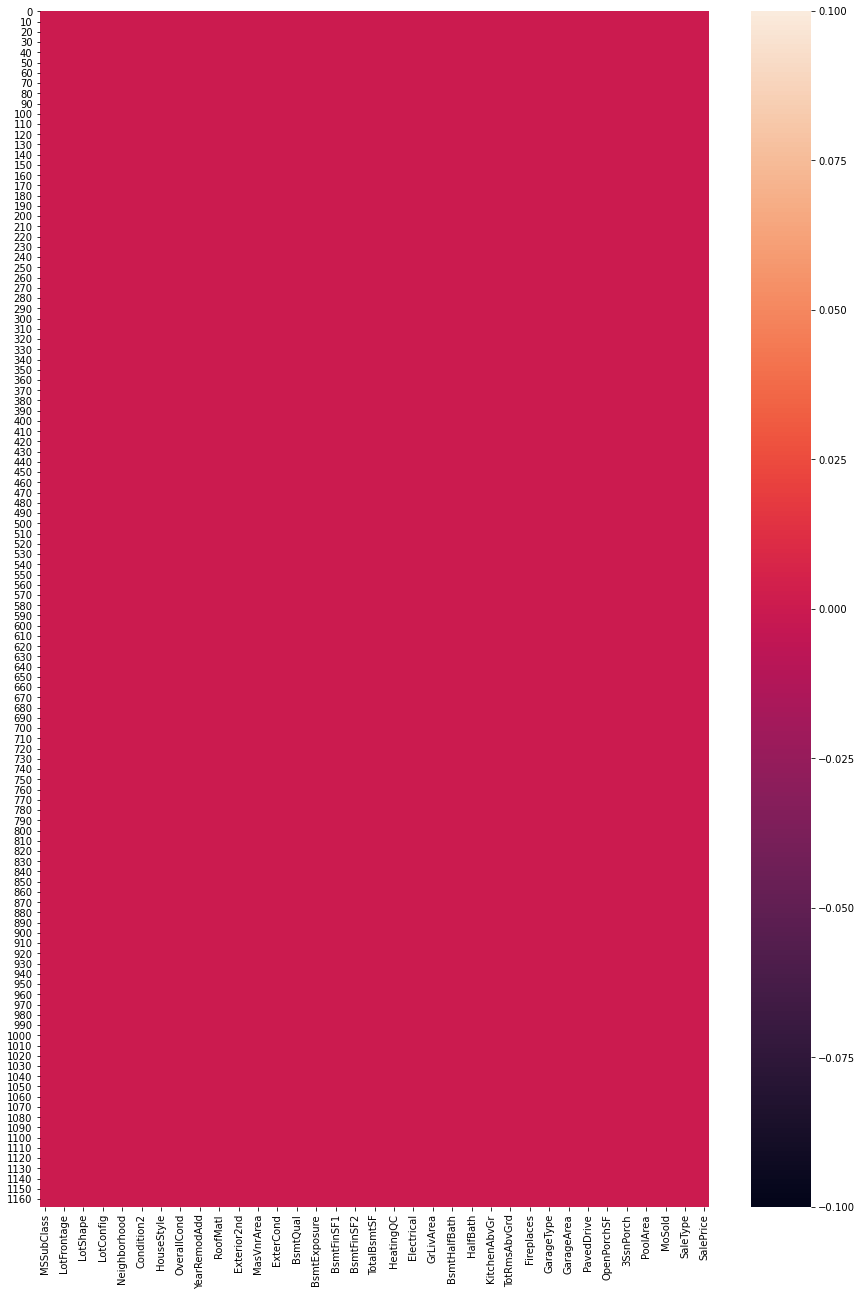

In [21]:
# Visualization of null values with the heatmap
plt.figure(figsize=(15,22))
sns.heatmap(train_df.isnull())

In [22]:
#Exploring the Categorical columns

train_df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MoSold       YrSold      SalePrice
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000  1168.000000   1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   1168.000000  1168.000000   1168.000000   1168.000000  1168.000000  1168.000000   1168.000000   1168.000000   1168.000000  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000    1168.000000
mean     56.767979    61.829623   10484.749144     6.104452     5.595890  1970.930651   1984.758562   444.726027    46.647260   569.721747  1061.095034      6.380137  1525.066781      0.425514      0.055651     1.562500     0.388699      2.884418      1.045377      6.542808     0.617295     1.776541   476.860445    96.206336    46.559932      23.015411     3.639555    15.051370     3.448630     6.344178  2007.804795  181477.005993
std      41.940650    29.625904    8957.442311     1.390153     1.124343    30.145255     20.785185   462.664785   163.520016   449.375525   442.272249     50.892844   528.042957      0.521615      0.236699     0.551882     0.504929      0.817229      0.216292      1.598484     0.650575     0.745554   214.466769   126.158988    66.381023      63.191089    29.088867    55.080816    44.896939     2.686352     1.329738   79105.586863
min      20.000000    21.000000    1300.000000     1.000000     1.000000  1875.000000   1950.000000     0.000000     0.000000     0.000000     0.000000      0.000000   334.000000      0.000000      0.000000     0.000000     0.000000      0.000000      0.000000      2.000000     0.000000     0.000000     0.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000     1.000000  2006.000000   34900.000000
25%      20.000000    41.750000    7621.500000     5.000000     5.000000  1954.000000   1966.000000     0.000000     0.000000   216.000000   799.000000      0.000000  1143.250000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000     1.000000   338.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000     5.000000  2007.000000  130375.000000
50%      50.000000    64.000000    9522.500000     6.000000     5.000000  1972.000000   1993.000000   385.500000     0.000000   474.000000  1005.500000      0.000000  1468.500000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000     2.000000   480.000000     0.000000    24.000000       0.000000     0.000000     0.000000     0.000000     6.000000  2008.000000  163995.000000
75%      70.000000    79.250000   11515.500000     7.000000     6.000000  2000.000000   2004.000000   714.500000     0.000000   816.000000  1291.500000      0.000000  1795.000000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.000000     2.000000   576.000000   171.000000    70.000000       0.000000     0.000000     0.000000     0.000000     8.000000  2009.000000  215000.000000
max     190.000000   313.000000  164660.000000    10.000000     9.000000  2010.000000   2010.000000  5644.000000  1474.000000  2336.000000  6110.000000    572.000000  5642.000000      3.000000      2.000000     3.000000     2.000000      8.000000      3.000000     14.000000     3.000000     4.000000  1418.000000   857.000000   547.000000     552.000000   508.000000   480.000000   738.000000    12.000000  2010.000000  755000.000000

In [23]:
#checking the correlation

train_cor=train_df.corr()
train_cor

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea    MoSold    YrSold  SalePrice
MSSubClass       1.000000    -0.239700 -0.124151     0.070462    -0.056978   0.023988      0.056618   -0.052236   -0.062403  -0.134170    -0.214042      0.053737   0.086448      0.004556      0.008207  0.140807  0.168423     -0.013283      0.283506      0.051179   -0.035792   -0.027639   -0.092408   -0.022609     0.017468      -0.004252  -0.043210    -0.013291  0.009583 -0.016015 -0.038595  -0.060775
LotFrontage     -0.239700     1.000000  0.126480     0.204126    -0.046934   0.060865      0.095100    0.126264   -0.033039   0.152166     0.274480      0.027968   0.275919      0.024270      0.000498  0.133694  0.010961      0.171265      0.022737      0.249706    0.094869    0.197450    0.250239    0.026514     0.104584       0.023639   0.016563     0.024523  0.148441  0.019558 -0.013570   0.249767
LotArea         -0.124151     0.126480  1.000000     0.107188     0.017513   0.005506      0.027228    0.221851    0.056656   0.006600     0.259733     -0.001915   0.281360      0.142387      0.059282  0.123197  0.007271      0.117351     -0.013075      0.184546    0.285983    0.158313    0.195162    0.216720     0.093080      -0.007446   0.025794     0.025256  0.097107  0.015141 -0.035399   0.249499
OverallQual      0.070462     0.204126  0.107188     1.000000    -0.083167   0.575800      0.555945    0.219643   -0.040893   0.308676     0.528285     -0.039295   0.599700      0.101732     -0.030702  0.548824  0.296134      0.099639     -0.178220      0.432579    0.390067    0.596322    0.566782    0.227137     0.341030      -0.098374   0.045919     0.059387  0.072247  0.090638 -0.048759   0.789185
OverallCond     -0.056978    -0.046934  0.017513    -0.083167     1.000000  -0.377731      0.080669   -0.028810    0.044336  -0.146384    -0.162481      0.041877  -0.065006     -0.039680      0.091016 -0.171931 -0.052125      0.028393     -0.076047     -0.039952   -0.013632   -0.161996   -0.126021    0.012290    -0.024899       0.056074   0.040476     0.069463 -0.003603  0.005519  0.055517  -0.065642
YearBuilt        0.023988     0.060865  0.005506     0.575800    -0.377731   1.000000      0.592829    0.227933   -0.027682   0.155559     0.386265     -0.189044   0.198644      0.164983     -0.028161  0.471264  0.243227     -0.080639     -0.167869      0.095476    0.134313    0.525346    0.473216    0.204830     0.191069      -0.373544   0.037079    -0.058760  0.006408  0.031754 -0.013976   0.514408
YearRemodAdd     0.056618     0.095100  0.027228     0.555945     0.080669   0.592829      1.000000    0.114430   -0.044694   0.174732     0.280720     -0.072526   0.295048      0.104643     -0.011375  0.444446  0.194943     -0.035847     -0.139943      0.206923    0.118378    0.428325    0.387744    0.197410     0.238755      -0.193574   0.064763    -0.046220  0.006874  0.024663  0.033265   0.507831
BsmtFinSF1      -0.052236     0.126264  0.221851     0.219643    -0.028810   0.227933      0.114430    1.000000   -0.052145  -0.499861     0.518940     -0.070932   0.217160      0.645126      0.063895  0.054511  0.015767     -0.114888     -0.065450      0.043499    0.257482    0.197529    0.286290    0.192939     0.108802      -0.082351   0.025485     0.033490  0.154769  0.007482  0.005614   0.362874
BsmtFinSF2      -0.062403    -0.033039  0.056656    -0.040893     0.044336  -0.027682     -0.044694   -0.052145    1.000000  -0.213580     0.098167     -0.000577  -0.007484      0.163518      0.093692 -0.060773 -0.023734     -0.005788     -0.034411     -0.033702    0.047945   -0.020806   -0.002051    0.094690    -0.014103       0.032081  -0.031263     0.076561  0.045990 -0.014

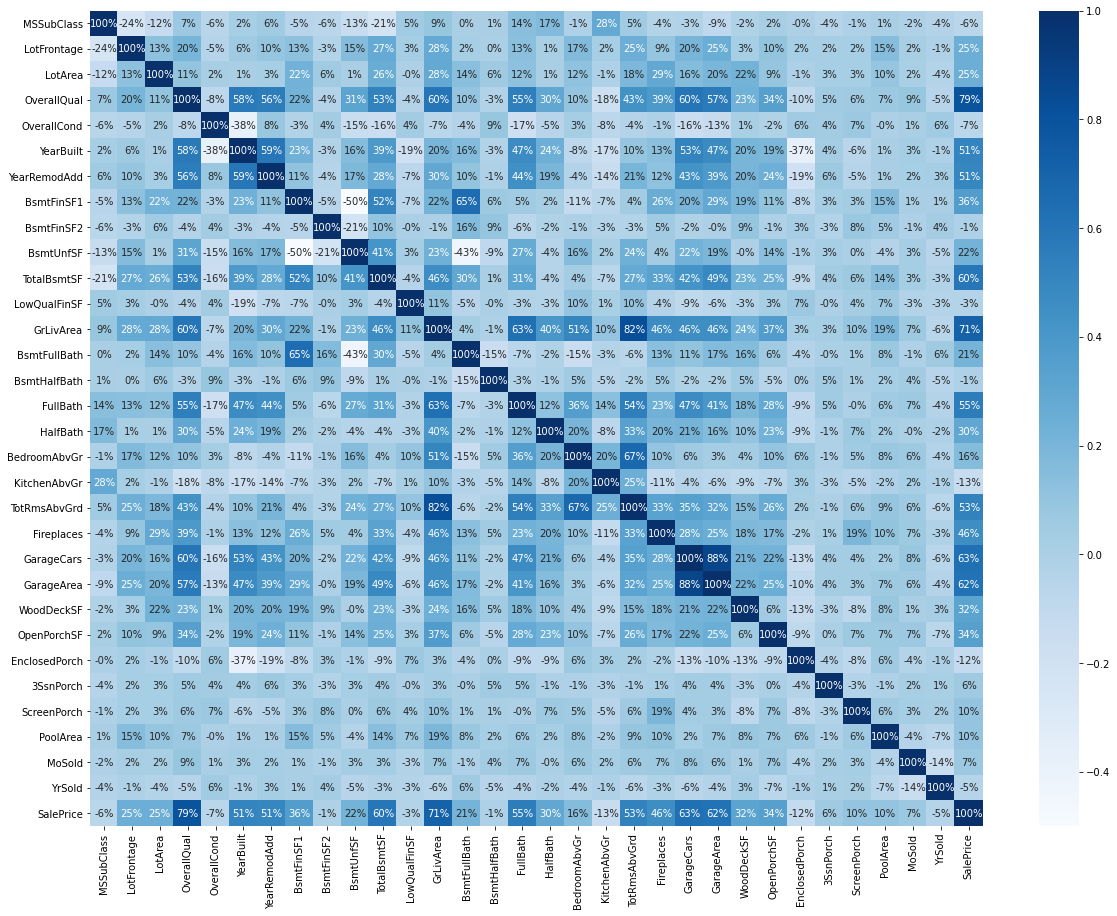

In [24]:
plt.figure(figsize=(20,15))

sns.heatmap(train_cor,annot=True,cmap='Blues',fmt='.0%')

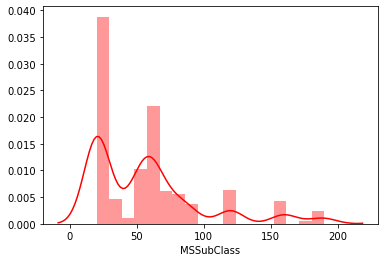

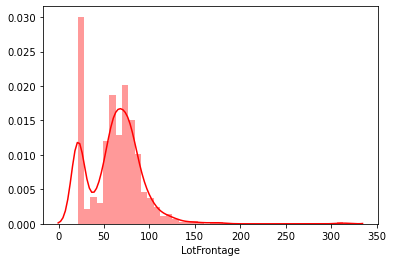

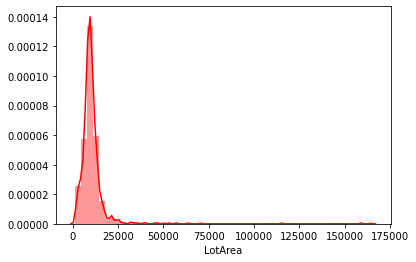

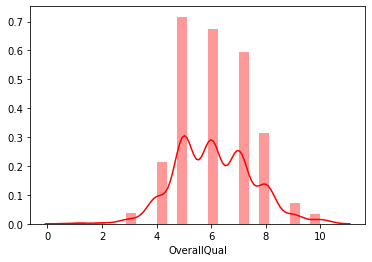

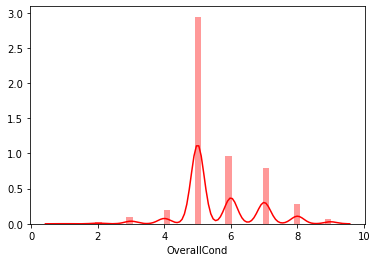

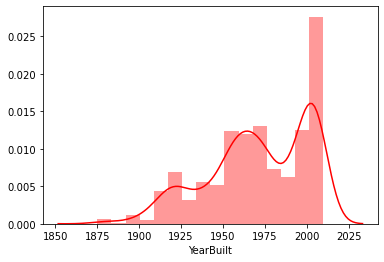

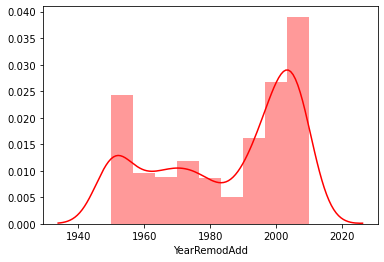

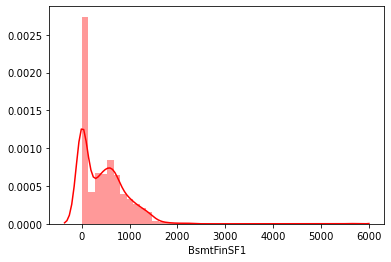

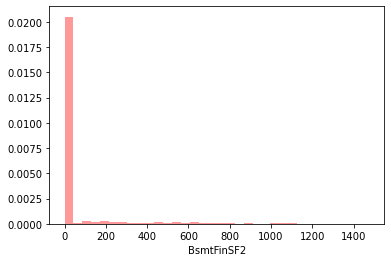

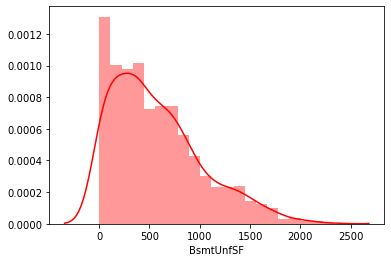

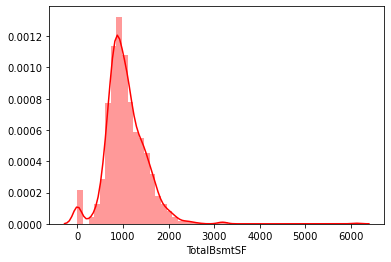

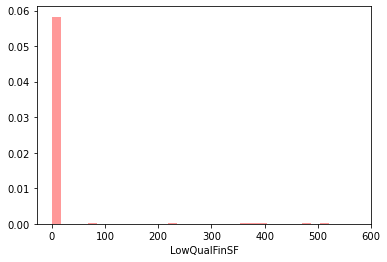

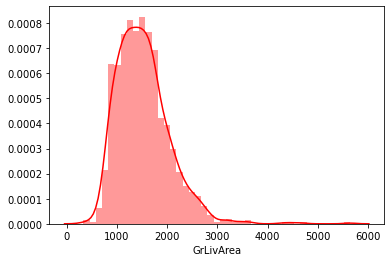

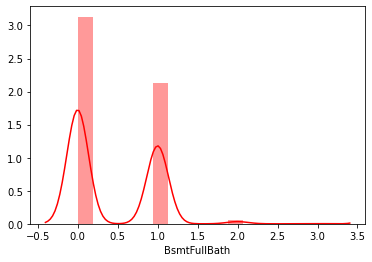

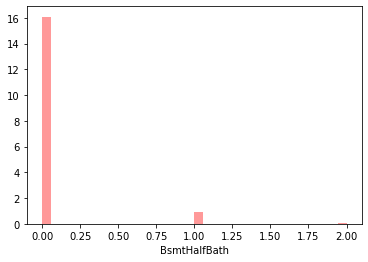

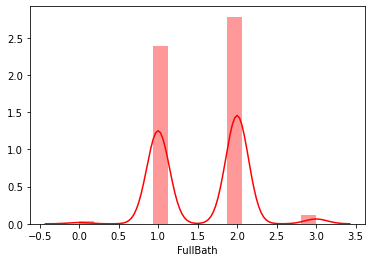

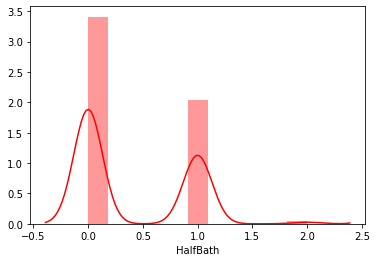

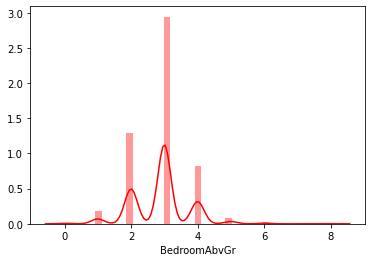

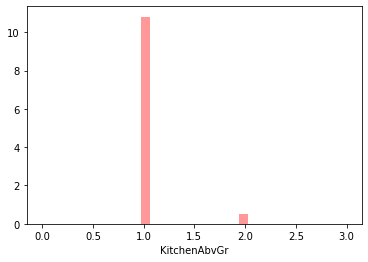

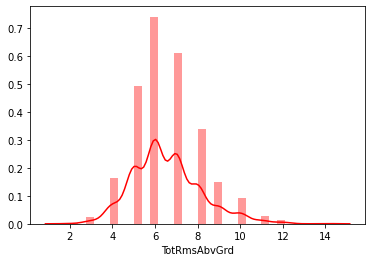

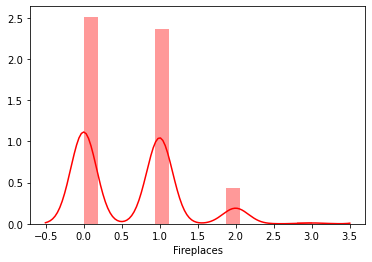

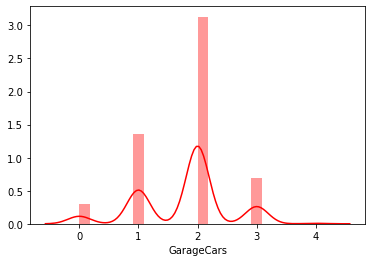

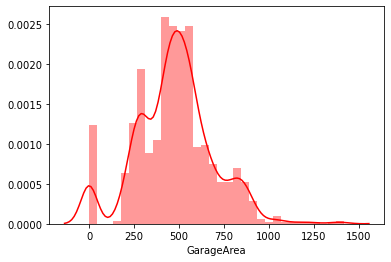

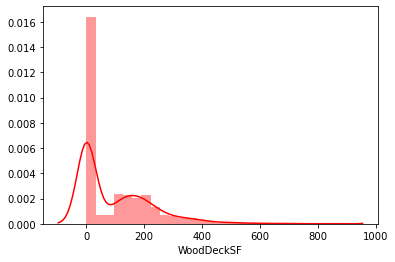

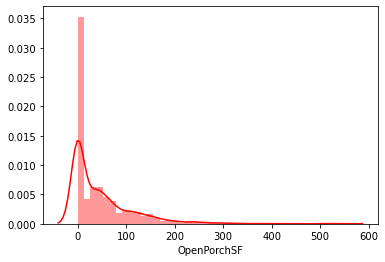

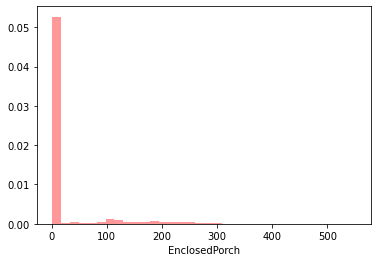

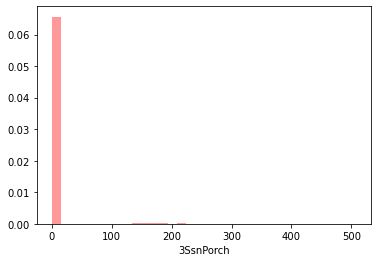

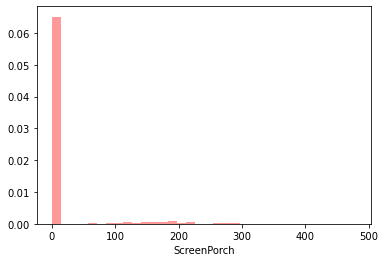

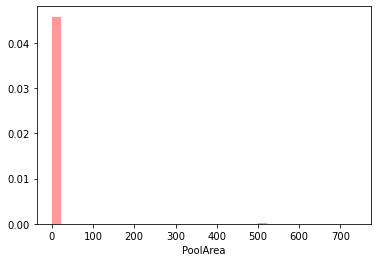

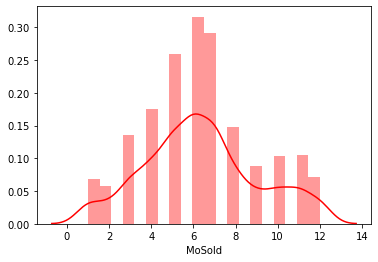

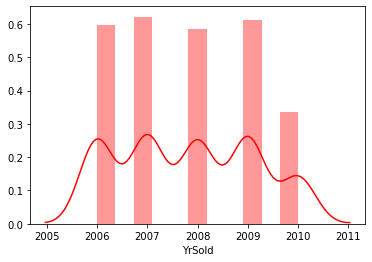

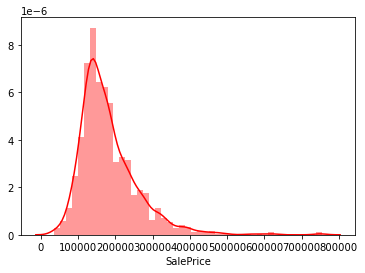

In [25]:
for col in train_df.describe().columns:
    sns.distplot(train_df[col],color='r')
    plt.show()

In [26]:
train_df.skew()

MSSubClass        1.422019
LotFrontage       1.253601
LotArea          10.659285
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
BsmtFinSF1        1.871606
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
LowQualFinSF      8.666142
GrLivArea         1.449952
BsmtFullBath      0.627106
BsmtHalfBath      4.264403
FullBath          0.057809
HalfBath          0.656492
BedroomAbvGr      0.243855
KitchenAbvGr      4.365259
TotRmsAbvGrd      0.644657
Fireplaces        0.671966
GarageCars       -0.358556
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
3SsnPorch         9.770611
ScreenPorch       4.105741
PoolArea         13.243711
MoSold            0.220979
YrSold            0.115765
SalePrice         1.953878
dtype: float64

In [27]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for col in train_df.columns:
    if(train_df[col].dtype==np.float64):
        continue
    train_df[col] = le.fit_transform(train_df[col].astype(str))
#    train_df[col]=le.fit_transform(train_df[col])

In [49]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for col in test_df.columns:
    if(test_df[col].dtype==np.float64):
        continue
    test_df[col] = le.fit_transform(test_df[col].astype(str))
#    train_df[col]=le.fit_transform(train_df[col])

In [28]:
train_df

MSSubClass  MSZoning  LotFrontage  LotArea  LotShape  LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  GarageType  GarageCars  GarageArea  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  Fence  MoSold  YrSold  SaleType  SaleCondition  SalePrice
0              0         3         21.0      509         0            3          4          0            13           2           2         4           2            6            4         75            26          1         1            8            9           2           0          3          4           1         2         3             3             0          56             5           0        663           45        1          4           1           4             0        728             0             0         2         0             2             1            3             7           6           1            4           1           2         131           4           2           0           74              0          0            0         0      4       4       1         8              4         72
1              4         3         95.0      355         0            3          4          1            12           2           2         0           2            8            5         69            20          0         5           12           13           2           0          2          2           2         4         1             1             0         218             4         114         16          383        1          0           1           4             0        558             1             0         2         0             4             1            2            10           6           1            4           1           2         261           4           2         232           75              0          0           40         0      4       1       1         8              4        411
2              9         3         92.0      883         0            3          1          0            15           2           2         0           5            7            4         95            47          1         1            7            7           2           0          2          4           2         2         3             0             2         502             5           0        269           71        1          0           1           4             0        497             1             0         2         1             3             1            3            10           6           1            4           1           2         142           4           2          58           26              0          0            0         0      4       8       1         8              4        413
3              4         3        105.0      175         0            3          4          0            14           2           2         0           2            6            5         76            27          3         1            8            9           1         209          3          4           1         2         3             3             1         428             5           0         52          349        1          0           1           4             0        432             0             0         2         0             3             1            3             9           6           1            4           1           2         213           4           2           0           20     

In [56]:
test_df

MSSubClass  MSZoning  LotFrontage  LotArea  LotShape  LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  GarageType  GarageCars  GarageArea  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  Fence  MoSold  YrSold  SaleType  SaleCondition
0             9         2         86.0      230         0            1          0          0            14           2           0         0           2            7            2         77            48          3         0           11            3           3          27          2          3           2         0         3             1             2         103             5           0         77           19        0          0           1           3             0         71             1             0         2         0             3             0            2             8           5           1            2           1           3          37           4           2          25           60              0          0            0         0      4      11       1         5              2
1             0         2         21.0       58         0            3          1          0            14           2           0         4           2            6            2         57            25          1         0            7            9           2           0          2          3           1         2         3             0             2         118             5           0        177          154        0          2           1           3             0        194             1             0         1         0             1             0            2             4           5           1            0           1           2           9           4           2          76            0              0          0            0         0      4       2       3         0              0
2             9         2         21.0      191         3            3          4          0            18           2           0         0           2            6            2         73            42          3         0           11            3           2           0          2          3           2         2         3             0             5           0             5           0        173            9        0          0           1           3             0         56             0             0         2         0             3             0            0             7           5           1            4           1           2         157           4           2          29           10              0          0            0         0      4      10       3         5              2
3             2         2         75.0      197         3            0          4          0            19           2           0         0           5            5            4         18             0          1         0            8           11           2           0          3          3           1         4         3             3             4         143             5           0         25           59        0          0           1           3             0        243             0             0         1         1             3             0            1             7           5           1            2           1           1         144           4           2           0            0              0          0            0         0    

In [29]:
#train_df.drop(columns=['SalePrice'],axis=1,inplace = True)

In [30]:
train_df.head()

MSSubClass  MSZoning  LotFrontage  LotArea  LotShape  LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  GarageType  GarageCars  GarageArea  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  Fence  MoSold  YrSold  SaleType  SaleCondition  SalePrice
0           0         3         21.0      509         0            3          4          0            13           2           2         4           2            6            4         75            26          1         1            8            9           2           0          3          4           1         2         3             3             0          56             5           0        663           45        1          4           1           4             0        728             0             0         2         0             2             1            3             7           6           1            4           1           2         131           4           2           0           74              0          0            0         0      4       4       1         8              4         72
1           4         3         95.0      355         0            3          4          1            12           2           2         0           2            8            5         69            20          0         5           12           13           2           0          2          2           2         4         1             1             0         218             4         114         16          383        1          0           1           4             0        558             1             0         2         0             4             1            2            10           6           1            4           1           2         261           4           2         232           75              0          0           40         0      4       1       1         8              4        411
2           9         3         92.0      883         0            3          1          0            15           2           2         0           5            7            4         95            47          1         1            7            7           2           0          2          4           2         2         3             0             2         502             5           0        269           71        1          0           1           4             0        497             1             0         2         1             3             1            3            10           6           1            4           1           2         142           4           2          58           26              0          0            0         0      4       8       1         8              4        413
3           4         3        105.0      175         0            3          4          0            14           2           2         0           2            6            5         76            27          3         1            8            9           1         209          3          4           1         2         3             3             1         428             5           0         52          349        1          0           1           4             0        432             0             0         2         0             3             1            3             9           6           1            4           1           2         213           4           2           0           20              0  

In [31]:
# from scipy.stats import zscore

# z=np.abs(zscore(train_df))

In [32]:
# threshold = 3
# print(np.where(z>3))

In [33]:
# df_new=train_df[(z<3).all(axis=1)]

In [34]:
# print(train_df.shape, '\t\t',df_new.shape)

In [35]:
# train_df=df_new
train_df.shape

(1168, 69)

In [57]:
test_df.shape

(292, 68)

# Model Building Phase

In [36]:
x=train_df.drop(columns=['SalePrice'],axis=1)

In [37]:
y=train_df['SalePrice']

In [38]:
x.shape

(1168, 68)

In [39]:
y.shape

(1168,)

In [40]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()

x=ss.fit_transform(x)

In [41]:
# Splitting the data into training data and testing data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [42]:
#Checkign the shape

print(x_train.shape, '\t\t', y_train.shape)

(934, 68) 		 (934,)


In [43]:
print(x_test.shape, '\t\t', y_test.shape)

(234, 68) 		 (234,)


In [44]:
# IMporting all the model library

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Importing boosting algorithm 

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

#Importing error metrics

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,auc,roc_curve
from sklearn.model_selection import cross_val_score, GridSearchCV

In [58]:
#All algorithms by using for loop

model=[GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),
      AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(test_df)
    print('Accuracy Score of',m,'is :')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print("**********************************************")
    print('\n')

Accuracy Score of GaussianNB() is :


ValueError: Found input variables with inconsistent numbers of samples: [234, 292]

In [ ]:
# Cross validate the models 

models=[LogisticRegression(),GaussianNB(),SVC(),KNeighborsClassifier(),DecisionTreeClassifier(),
       AdaBoostClassifier(),GradientBoostingClassifier(),RandomForestClassifier(),ExtraTreesClassifier(),BaggingClassifier()]

for m in models:
    score=cross_val_score(m,x,y,cv=15,scoring='accuracy')
    print("Model: ", m)
    print("Score: ",score)
    print("Mean Score: ",score.mean())
    print("Standard Deviation: ", score.std())
    print("******************************************")
    print("\n")